In [29]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
from collections import defaultdict
from pathlib import Path
from typing import List, Dict, Any

In [30]:
def filter_corrupt_files(paths: List[Path]) -> (List[Dict[str, Any]], List[str]):
    """
    Filter out files that are not valid json files
    """
    data = {}
    corrupt_files = []
    for path in paths:
        try:
            with open(path, "r") as f:
                single_result = json.load(f)
            data[path.name] = single_result
        except json.decoder.JSONDecodeError:
            corrupt_files.append(path.name)
    return data, corrupt_files

In [31]:
# import Zhinan's data

paths = "../data/zhihan/"

data_z, corrupt_z = filter_corrupt_files([Path(paths) / file for file in os.listdir(paths)])

print("Corrupt: ", corrupt_z)


Corrupt:  []


In [32]:
codedirs = defaultdict(dict)
for d in data_z.values():
    if d["code_dirs"]:
        for folder, source_type_dict in d["code_dirs"].items():
            if folder.lower() == d["project_name"].lower():
                codedirs[d["project_name"]] |= {("PROJECT_NAME", "py"): source_type_dict["py"], ("PROJECT_NAME","ipynb"): source_type_dict["ipynb"]}
            else:
                codedirs[d["project_name"]] |= {(folder, "py"): source_type_dict["py"], (folder,"ipynb"): source_type_dict["ipynb"]}
    else:
        codedirs[d["project_name"]] = {}

df_codedirs = pd.DataFrame.from_dict(codedirs, orient="index")

python_projects = set(df_codedirs.index)
print("Number of Python projects: ", len(python_projects))

Number of Python projects:  1113


### Are folders specialized - either for Python files or for notebooks?

In [33]:
# Are folders specialized - either for Python files or for notebooks?

# How many subcolumns nave both nonzero values, compared to one column having zero value?

codedirs_py = df_codedirs.xs('py', level=1, axis=1)
codedirs_ipynb = df_codedirs.xs('ipynb', level=1, axis=1)

print("Python files only")
display(codedirs_py.head())
print("Notebooks only")
display(codedirs_ipynb.head())

codedirs_sum = codedirs_py + codedirs_ipynb

print("Sum of Python files and notebooks")
display(codedirs_sum.head())

only_py_df = (codedirs_ipynb == 0) & (codedirs_py > 0)
only_ipynb_df = (codedirs_ipynb > 0) & (codedirs_py == 0)
both_df = (codedirs_ipynb > 0) & (codedirs_py > 0)

Python files only


,scripts,notebooks-pc-linux,notebooks,dna_puller,gnuplot_generator,lib,tutorial,sphinx,python,PROJECT_NAME,...,two_population_analysis,n_t,qt_app,calibration_zebrafish,calibration_mouse,apps,repo_management,analysis_code,maint_tools,spikein_analysis
SSUsearch,29.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pytest,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
microbiome-patterns,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meyer_lungfish,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moduledetection-evaluation,2.0,NaN,0.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notebooks only


,scripts,notebooks-pc-linux,notebooks,dna_puller,gnuplot_generator,lib,tutorial,sphinx,python,PROJECT_NAME,...,two_population_analysis,n_t,qt_app,calibration_zebrafish,calibration_mouse,apps,repo_management,analysis_code,maint_tools,spikein_analysis
SSUsearch,0.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pytest,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
microbiome-patterns,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meyer_lungfish,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moduledetection-evaluation,0.0,NaN,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sum of Python files and notebooks


,scripts,notebooks-pc-linux,notebooks,dna_puller,gnuplot_generator,lib,tutorial,sphinx,python,PROJECT_NAME,...,two_population_analysis,n_t,qt_app,calibration_zebrafish,calibration_mouse,apps,repo_management,analysis_code,maint_tools,spikein_analysis
SSUsearch,29.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pytest,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
microbiome-patterns,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meyer_lungfish,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moduledetection-evaluation,2.0,NaN,5.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### How many projects have code directory with only Python files, only notebooks, or both?

In [34]:

def group_names(name):
    # Check if the name ends with 's'
    if name.endswith('s'):
        # If it does, return the singular form
        return name[:-1].lower()
    else:
        # If it doesn't, return the name as is
        return name.lower()


def group_codedirs(df, threshold=5):
    df = df.sum(axis=0)
    df = df.groupby(group_names).sum().sort_values(ascending=False)
    df = df[df >= threshold]
    return df

only_ipynb =  group_codedirs(only_ipynb_df)

only_py = group_codedirs(only_py_df)

both = group_codedirs(both_df)

len(only_ipynb), len(only_py), len(both)

(7, 19, 9)

In [35]:
print("Folders containing both - py and ipynb files \n", both)
print("\nFolders containing py files only\n", only_py)
print("\nFolders containing notebooks only\n", only_ipynb)

Folders containing both - py and ipynb files 
 doc             53
project_name    30
notebook        22
code            11
analysi          9
script           6
figure           5
tutorial         5
python           5
dtype: int64

Folders containing py files only
 project_name    299
doc             248
script          116
src              97
tool             34
util             24
lib              19
data             19
bin              16
python           15
code             15
benchmark        12
docker           10
model             9
build             8
ci                6
contrib           5
misc              5
utilitie          5
dtype: int64

Folders containing notebooks only
 notebook    112
tutorial     25
doc          18
binder        6
ipynb         6
code          6
demo          5
dtype: int64


#### Check what % of following folders have only Python files, only notebooks, or both?
- tutorials
- documentation
- notebooks
- project_name

<Axes: title={'center': 'Common code directories'}>

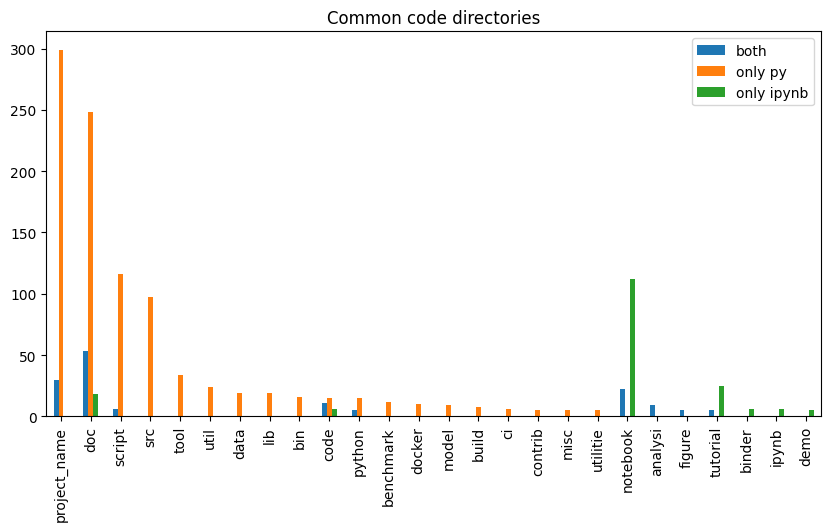

In [36]:

common_dirs = pd.concat({"both": both, "only py": only_py, "only ipynb": only_ipynb}, axis=1)
common_dirs.sort_values("only py", ascending=False, inplace=True)
common_dirs.plot.bar(figsize=(10,5), title="Common code directories")

#### Do projects have >1 folders with py/ipynb files?

<Axes: >

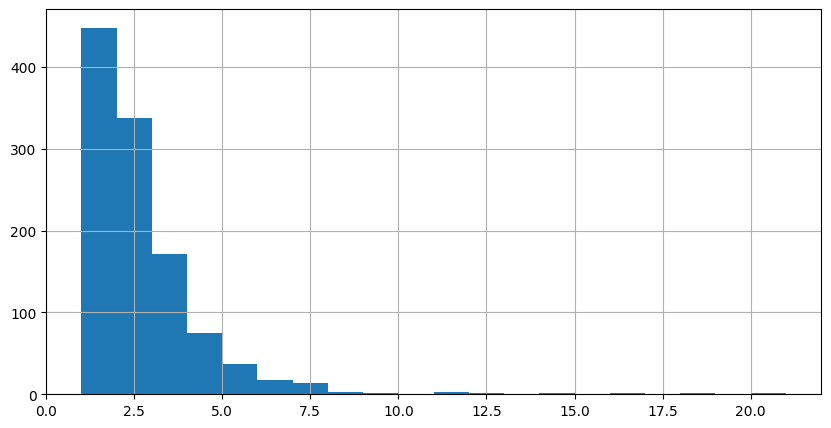

In [37]:
codedirs_numbers_df =  pd.concat({"both": both_df.sum(axis=1), "only py": only_py_df.sum(axis=1), "only ipynb": only_ipynb_df.sum(axis=1)}, axis=1)
codedirs_numbers_df["sum"] = codedirs_numbers_df.sum(axis=1)
codedirs_numbers_df.sort_values("sum", ascending=False, inplace=True)
codedirs_numbers_df["sum"].hist(bins=20, figsize=(10,5))

## Dependency declaration

In [38]:
depsfiles = defaultdict(list)
for d in data_z.values():
    if d["project_name"] in python_projects:
        if d["deps_file"]:
            depsfiles[d["project_name"]] = d["deps_file"]
        else:
            depsfiles[d["project_name"]] = {}


    # "deps_file": [
    #     {
    #         "source_type": "DepsSource",
    #         "path": "setup.py",
    #         "parser_choice": "setup.py",
    #         "deps_count": 0,
    #         "warnings": true
    #     },
# df_depsfiles = pd.DataFrame.from_dict(depsfiles, orient="index")
print({dd.get("source_type") for d in depsfiles.values() for dd in d})
print({dd.get("parser_choice") for d in depsfiles.values() for dd in d})



{'DepsSource'}
{'requirements.txt', 'pyproject.toml', 'setup.py', 'setup.cfg'}


In [39]:

threshold = 0

parser_choice = [len({entry["parser_choice"] for entry in v if entry["deps_count"]>threshold})  for _, v in depsfiles.items() if v]

print(len(depsfiles), 
 len(parser_choice), 
 len([v for v in parser_choice if v > 1]), 
 len([v for v in parser_choice if v > 2]), 
 len([v for v in parser_choice if v > 3]))


1113 677 163 3 0


In [40]:
# Sanity check - consistency between parser choice and names
from collections import Counter
parsed_files = defaultdict(list)
for k, v in depsfiles.items():
    for entry in v:
       if entry["deps_count"]>0:
           parsed_files[entry["parser_choice"]].append(entry["path"].split("/")[-1])


{k: Counter(v) for k, v in parsed_files.items()}


{'requirements.txt': Counter({'requirements.txt': 511,
          'dev-requirements.txt': 38,
          'test-requirements.txt': 26,
          'requirements_pip.txt': 24,
          'requirements-dev.txt': 22,
          'pinned-requirements.txt': 9,
          'requirements_conda.txt': 9,
          'conda_requirements.txt': 6,
          'requirements_dev.txt': 6,
          'requirements.in': 5,
          'doc-requirements.txt': 5,
          'test_requirements.txt': 5,
          'doc_requirements.txt': 5,
          'pip_requirements.txt': 4,
          'requirements_docs.txt': 4,
          'requirements_for_rdt.txt': 3,
          'rtd-requirements.txt': 3,
          'requirements_test.txt': 3,
          'docs-requirements.txt': 3,
          'driver_requirements.txt': 3,
          'lint-requirements.txt': 3,
          'requirements-doc.txt': 3,
          'requirements.dev.txt': 2,
          'requirements_doc.txt': 2,
          'rtd_requirements.txt': 2,
          'readthedocs_requirements.tx

In [41]:
# Sanity check - what % of setup.py files emit warnings?

warnings_setup_files = [(entry["warnings"], entry["deps_count"]) for k, v in depsfiles.items() for entry in v if entry["parser_choice"] == "setup.py"]

print("Just warnings: ", len(warnings_setup_files), sum([i for i, _ in warnings_setup_files]),
      sum([i for i,_ in warnings_setup_files])/len(warnings_setup_files))

print("Warnings, but dependencies found: ", len(warnings_setup_files), sum([i for i, j in warnings_setup_files if j>0]),
      sum([i for i,j in warnings_setup_files if j>0])/sum([i for i,_ in warnings_setup_files]))


print("Warnings with found deps compared to allfound deps: ", len([i for i,j in warnings_setup_files if j>0]), sum([i for i, j in warnings_setup_files if j>0]),
      sum([i for i,j in warnings_setup_files if j>0])/len([i for i,j in warnings_setup_files if j>0]))


Just warnings:  576 320 0.5555555555555556
Warnings, but dependencies found:  576 145 0.453125
Warnings with found deps compared to allfound deps:  278 145 0.5215827338129496


It looks like half of the setup.py files are not used to declare dependencies.

### Check if existence of dependency declaration is somehow correlated with the project structure.


Declared deps percent: 61.0
Undeclared deps percent: 39.0

 only_ipynb_df


,no_deps,declared_deps,all,% all - no_deps
notebook,57,55,112,50.9
tutorial,3,22,25,12.0
doc,5,13,18,27.8
binder,1,5,6,16.7
ipynb,2,4,6,33.3



 only_py_df


,no_deps,declared_deps,all,% all - no_deps
project_name,11,288,299,3.7
doc,16,232,248,6.5
script,52,64,116,44.8
src,31,66,97,32.0
tool,2,32,34,5.9



 both_df


,no_deps,declared_deps,all,% all - no_deps
doc,0,53,53,0.0
project_name,2,28,30,6.7
notebook,11,11,22,50.0
code,9,2,11,81.8
analysi,8,1,9,88.9



 total


,no_deps,declared_deps,all,% all - no_deps
project_name,13,316,329,4.0
doc,21,298,319,6.6
notebook,68,67,135,50.4
script,57,68,125,45.6
src,35,68,103,34.0


<Axes: title={'center': '% of projects with undeclared deps'}>

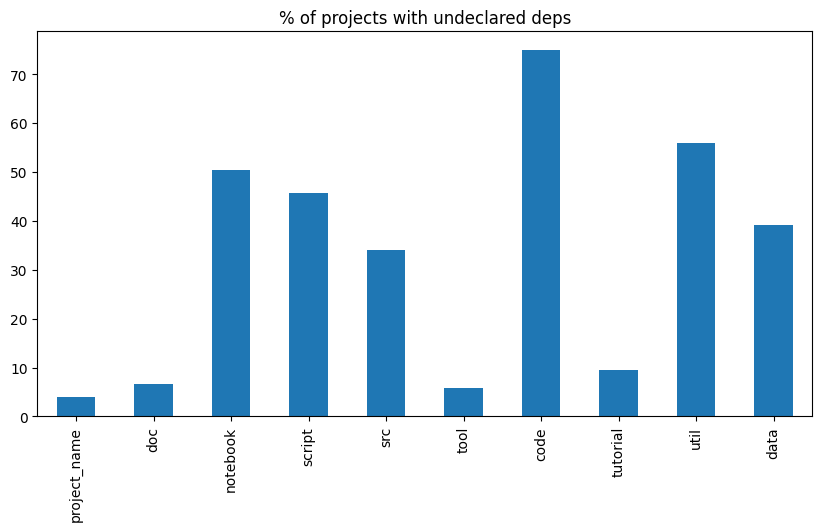

In [71]:
projects_without_deps = [k for k, v in depsfiles.items() if not v]
projects_with_deps = [k for k, v in depsfiles.items() if v]

dfs = {'only_ipynb_df': only_ipynb_df, 'only_py_df': only_py_df, 'both_df': both_df,
       'total': only_ipynb_df.add(only_py_df, fill_value=0).add(both_df, fill_value=0) }

print("Declared deps percent:", np.round(len(projects_with_deps) / len(depsfiles) * 100))
print("Undeclared deps percent:", np.round(len(projects_without_deps) / len(depsfiles) * 100))

declared_deps_split = {}
for name, df in dfs.items():
    print("\n", name)
    res1 = group_codedirs(df.loc[projects_without_deps,:], threshold=0)
    res2 = group_codedirs(df.loc[projects_with_deps,:], threshold=0)
    res3 = group_codedirs(df, threshold=0)
    declared_deps_split[name] = pd.concat({"no_deps": res1, "declared_deps": res2, "all": res3}, axis=1)
    declared_deps_split[name]["% all - no_deps"] = np.round(declared_deps_split[name]["no_deps"] / declared_deps_split[name]["all"], 3) * 100   
    display(declared_deps_split[name].sort_values("all", ascending=False).head())
    declared_deps_split[name].fillna(0, inplace=True)

declared_deps_split["total"][["% all - no_deps", "all"]].sort_values("all", ascending=False).head(10)["% all - no_deps"].plot.bar(figsize=(10,5), title="% of projects with undeclared deps")